# Stock Forecasting using Prophet (Cross Validation)

https://facebook.github.io/prophet/

In [1]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
stock = 'AMD' # input
start = '2017-01-01' # input 
end = '2021-11-08'  # input
df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


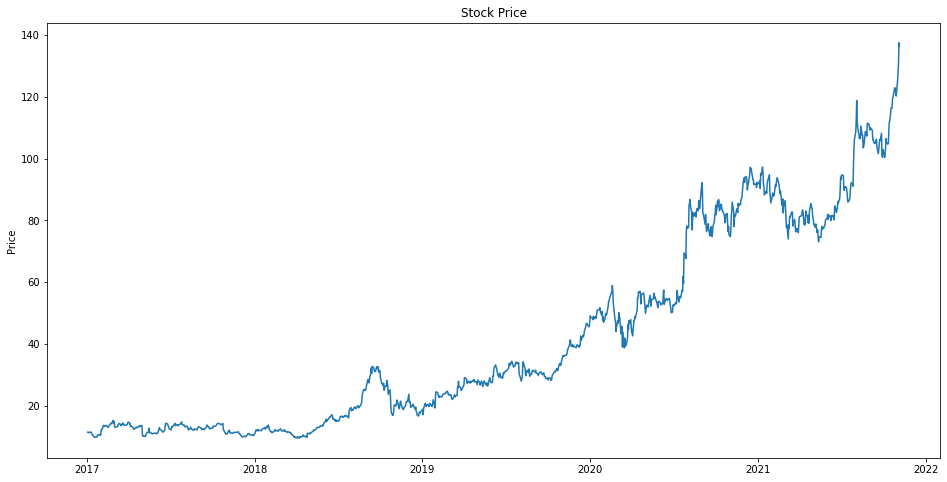

In [3]:
plt.figure(figsize=(16,8))
plt.plot(df['Adj Close'])
plt.title('Stock Price')
plt.ylabel('Price')
plt.show()

In [4]:
df = df.reset_index()
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})
df

,ds,Open,High,Low,y,Adj Close,Volume
0,2017-01-03,11.420000,11.650000,11.020000,11.430000,11.430000,55182000
1,2017-01-04,11.450000,11.520000,11.240000,11.430000,11.430000,40781200
2,2017-01-05,11.430000,11.690000,11.230000,11.240000,11.240000,38855200
3,2017-01-06,11.290000,11.490000,11.110000,11.320000,11.320000,34453500
4,2017-01-09,11.370000,11.640000,11.310000,11.490000,11.490000,37304800
...,...,...,...,...,...,...,...
1216,2021-11-01,119.449997,125.669998,118.129997,125.230003,125.230003,54559800
1217,2021-11-02,124.980003,128.460007,124.199997,127.629997,127.629997,53491900
1218,2021-11-03,127.750000,130.600006,126.790001,130.529999,130.529999,59537800
1219,2021-11-04,132.009995,139.000000,130.770004,137.500000,137.500000,84825200


In [5]:
df = df[['ds', 'y']]
df

,ds,y
0,2017-01-03,11.430000
1,2017-01-04,11.430000
2,2017-01-05,11.240000
3,2017-01-06,11.320000
4,2017-01-09,11.490000
...,...,...
1216,2021-11-01,125.230003
1217,2021-11-02,127.629997
1218,2021-11-03,130.529999
1219,2021-11-04,137.500000


In [6]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 4 forecasts with cutoffs between 2019-05-15 00:00:00 and 2020-11-05 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

In [8]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-05-16,26.706248,24.466170,29.065345,28.01,2019-05-15
1,2019-05-17,26.730188,24.520756,28.994367,27.50,2019-05-15
2,2019-05-20,26.936491,24.505858,29.168624,26.68,2019-05-15
3,2019-05-21,27.035394,24.671857,29.405994,27.35,2019-05-15
4,2019-05-22,27.125576,24.887426,29.363702,27.41,2019-05-15


In [9]:
cutoffs = pd.to_datetime(['2017-02-15', '2017-08-15', '2018-02-15'])
df_cv2 = cross_validation(m, cutoffs=cutoffs, horizon='365 days')

  0%|          | 0/3 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 23.


In [10]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,41.804418,6.465634,4.850222,0.102407,0.071483,0.112980,0.483333
1,38 days,43.750145,6.614389,4.968943,0.104943,0.074832,0.116034,0.473333
2,39 days,47.017444,6.856927,5.178873,0.107827,0.083586,0.119475,0.455000
3,40 days,48.130885,6.937643,5.246923,0.107589,0.087413,0.118961,0.446667
4,41 days,49.704613,7.050150,5.377826,0.109167,0.087802,0.120477,0.430000


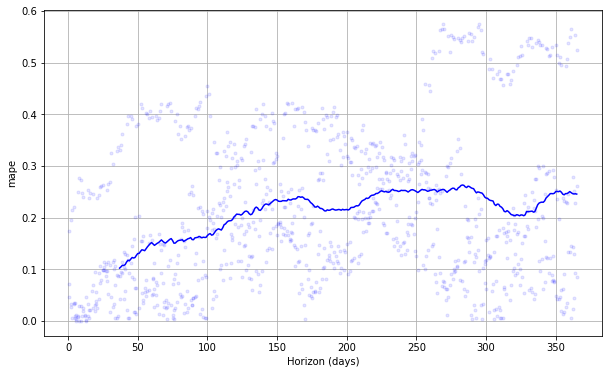

In [11]:
fig = plot_cross_validation_metric(df_cv, metric='mape')